<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab07_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [154]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt


# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [155]:
# write your function here
def trap(x,y):
  """
  Takes in arrays of x and y values

  INPUTS:
  x - array / list of x positions
  y - array / list of y positions

  RETURNS:
  A - list of  integral values of y between x values using trapezoidal method
  """
  A = 0
  for i in range(1, len(x)):
    A += 0.5 * (y[i-1] + y[i]) * (x[i] - x[i-1])
  return A


# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [156]:
# write your function mycircle here
def mycircle(x, r = 2):
  """
  Calculates y-values of a circle over a range of x-values

  INPUTS:
  x - array / list of x values
  r - radius of circle (optional arguement), default set to 2

  RETURNS:
  y - list of y-values
  """
  y = np.sqrt(r**2 - x**2)

  return y


### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [157]:
x = np.linspace(-2,2,100)
y = mycircle(x)

A = trap(x, y)
print(f"The area under the curve of the circle from -2 to 2 is {A:.5f}")

The area under the curve of the circle from -2 to 2 is 6.27644


### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [158]:
known = (0.5)*np.pi*2**2
perc_error = ((known - A) / known) * 100
print(perc_error)

0.10741731217529554


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**YOUR ANSWER HERE**



In [159]:
x = np.linspace(-2,2,1000)
y = mycircle(x)

A = trap(x, y)
print(f"The area under the curve of the circle from -2 to 2 is {A:.5f}")

known = (0.5)*np.pi*2**2
perc_error = ((known - A) / known) * 100
print(perc_error)

The area under the curve of the circle from -2 to 2 is 6.28297
0.003352902655526221


# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [160]:
def mygauss(x, mean=0, sigma=1):
  """
  Calculates the Gaussian Function (normal distribution)

  INPUTS:
  x - values for x
  mean - average distribution
  sigma - standard deviation of the distribution

  RETURNS:
  fx - values calculated
  """

  fx = (1 / np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5*( (x - mean) / sigma)**2)

  return fx

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [161]:
x_val = np.linspace(-1,1,100)
y_val = mygauss(x_val)

A = trap(x_val,y_val)

perc_error = np.abs(0.682 - A) / 0.682 *100
perc_error

0.09868519049092601

Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [162]:
x_val = np.linspace(-2,2,100)
y_val = mygauss(x_val,)

A = trap(x_val,y_val)

perc_error = np.abs(0.954 - A) / 0.954 *100
perc_error

0.049303675295145184

Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [163]:
x_val = np.linspace(-3,3,100)
y_val = mygauss(x_val)

A = trap(x_val,y_val)

perc_error = np.abs(0.996 - A) / 0.996 *100
perc_error

0.12972566535386193

# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [164]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapezoid as trapint
# set up x and y arrays for the half circle
x = np.linspace(-2, 2, 100)
y = mycircle(x)
# call scipy.integrate.trapezoid to perform the integration
integral = trapint(y, x)
# print your result and the expected answer in a formatted print statement
print(f"Trapezoid integral of a half circle (-2,2) = {integral:.5f}")

Trapezoid integral of a half circle (-2,2) = 6.27644


In [165]:
# import scipy.integrate.trapezoid

# set up x and y arrays for the gaussian
x = np.linspace(-1,1,100)
y = mygauss(x)
# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
integral = trapint(y,x)
# print your result and the expected answer in a formatted print statement
print(f"Trapezoid integral of gaussian distribution (-1 sigma, 1 sigma)= {integral:.5f}")

Trapezoid integral of gaussian distribution (-1 sigma, 1 sigma)= 0.68267


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



In [200]:
# your monte carlo function here
def mcintegrate(visualize=False):
  xrandom = np.random.uniform(low = -2, high = 2, size = 10000)
  yrandom = np.random.uniform(low = 0, high = 2, size = 10000)
  x = np.linspace(-2,2, 10000)
  func = mycircle(x)

  keepFlag = yrandom < np.sqrt(2**2 - xrandom**2)
  Ngood = np.sum(keepFlag)

  badFlag = yrandom > np.sqrt(2**2 - xrandom**2)
  Nbad = np.sum(badFlag)

  Area = Ngood / (Ngood + Nbad)

  if visualize == True:
    plt.plot(xrandom[keepFlag], yrandom[keepFlag], 'bo', label='Good')
    plt.plot(xrandom[badFlag], yrandom[badFlag], 'ro', label='Bad')
    plt.plot(x,func, 'k-', linewidth=5, label='Function')
    plt.legend()

    plt.title(f'Monte Carlo Area = {Area}')
  else:
    None
  return Area

### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

0.7815

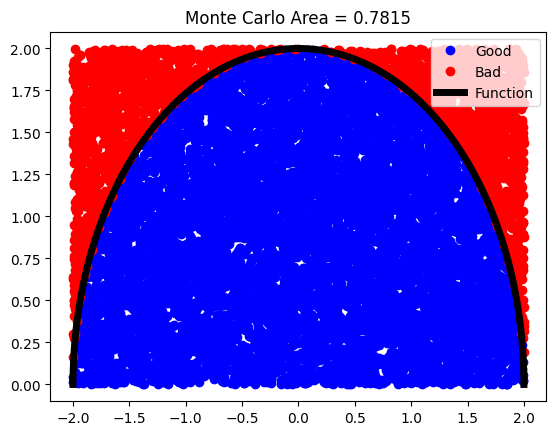

In [201]:
# your code to calculate the area of a half circle using monte carlo
mcintegrate(True)